<a href="https://colab.research.google.com/github/RohanNemade/Heart-Failure-Prediction-Vizualization/blob/main/Copy_of_UG_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the librares
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from keras.models import Sequential
from keras.layers import Dense, Dropout

# Data Preprocessing

In [2]:
# Reading the dataset file
dataset = pd.read_csv('/content/drive/MyDrive/UG Project/UG project dataset.csv')
columns = list(dataset.columns)

print(dataset.head())   # Print first 5 rows of dataset
print("\n")
print(*columns, sep=' | ')
print("\n")

  Alloy code     C  ...   Elongation (%)   Reduction in Area (%)
0        MBB  0.12  ...               30                      71
1        MBB  0.12  ...               27                      72
2        MBB  0.12  ...               23                      69
3        MBB  0.12  ...               21                      70
4        MBB  0.12  ...               26                      79

[5 rows x 20 columns]


Alloy code |  C |  Si |  Mn |  P |  S |  Ni |  Cr |  Mo |  Cu | V |  Al |  N | Ceq | Nb + Ta |  Temperature (°C) |  0.2% Proof Stress (MPa) |  Tensile Strength (MPa) |  Elongation (%) |  Reduction in Area (%)




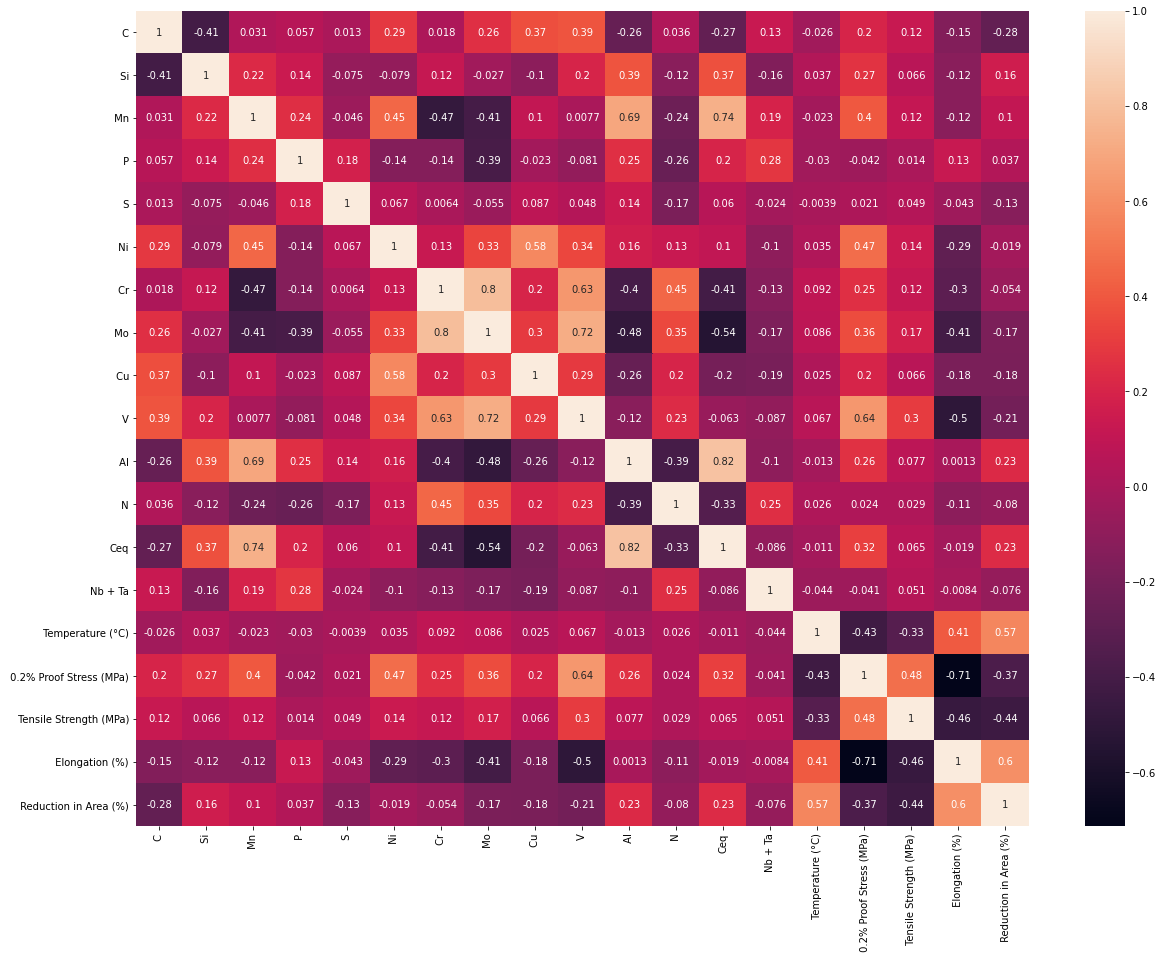

In [3]:
corr = dataset.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

##From above diagram following conclusions can be made:

1.   Temperature has significant influence on % Elongation and % Reduction in area.
2.   0.2% Proof Strength is highly influenced by presence of V, Ni, Mn, Mo, Ceq, Si, Al, Cr, C and Cu in decreasing order.
3.   Tensile Strength is highly influenced by presence of V and moderately influenced by presence of Mo, Ni, Cr, C and Mn in decreasing order.
4.   Tensile Strength is also highly related to 0.2% Proof Strength.
5.   % Elongation and % Reduction in Area show maximum correlation with each other followed by temperature. 
6.   % Elongation is moderately influenced by presence of P and slightly influenced by presence of Al
7.   % Reduction in Area is moderately influenced by presence of Al, Ceq, Si and Mn.



In [ ]:
# x includes all the input features including the composition of the alloy and temperature
# y includes the mechanical properties of the alloy which are to be predicted by the model
x = dataset.iloc[:, 1:16].values
y = dataset.iloc[:, 16:].values

# Making the train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, shuffle = True, random_state = 2)

In [ ]:
# Scaling down the inputs and outputs
# Scaling method used here is : scaled_value = (x - mean)/(std_dev) 

sc_x = StandardScaler()
sc_x.fit(x_train)
x_train_sc = sc_x.transform(x_train)
x_test_sc = sc_x.transform(x_test)

sc_y = StandardScaler()
sc_y.fit(y_train)
y_train_sc = sc_y.transform(y_train)
y_test_sc = sc_y.transform(y_test)

#    ______________________________________________
#   |  Scaled Variables    |   Unscaled Variables  |
#   |______________________|_______________________|
#   |    x_train_sc        |       x_train         | 
#   |    x_test_sc         |       x_test          |
#   |    y_train_sc        |       y_train         | 
#   |    y_test_sc         |       y_test          | 
#   |    y_rf_pred_sc      |       y_rf_pred       |
#   |    y_nn_pred_sc      |       y_nn_pred       |
#   |______________________|_______________________|

In [ ]:
print(min(y_train_sc[:,0]))

-2.2819541817681674


In [ ]:
# To be used later while visualizing results
actual_proof_strength = np.transpose(y_test)[0]
actual_tensile_strength = np.transpose(y_test)[1]
actual_pct_elongation = np.transpose(y_test)[2]
actual_pct_reduction_area = np.transpose(y_test)[3]

# Regression using Neural Network

In [ ]:
# Building the Neural Network

model = Sequential()
model.add(Dense(units = 15, kernel_initializer = 'normal', activation = 'tanh', input_dim = 15))
model.add(Dense(units = 30, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 45, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 40, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 30, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 20, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 4, kernel_initializer = 'normal', activation = 'tanh'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [ ]:
# Training the model and predicting the results
history = model.fit(x_train_sc, y_train_sc, batch_size = 256, shuffle=True, epochs = 10000)
y_nn_pred_sc = model.predict(x_test_sc)

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.4091 - mean_squared_error: 0.4091
Epoch 7502/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.2718 - mean_squared_error: 0.2718
Epoch 7503/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.2874 - mean_squared_error: 0.2874
Epoch 7504/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.4182 - mean_squared_error: 0.4182
Epoch 7505/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.2721 - mean_squared_error: 0.2721
Epoch 7506/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.4104 - mean_squared_error: 0.4104
Epoch 7507/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.2817 - mean_squared_error: 0.2817
Epoch 7508/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.4189 - mean_squared_error: 0.4189
Epoch 7509/10000
3/3 [==============================]

In [ ]:
# Determining the model's accuracy
r2_nn = r2_score(y_test_sc, y_nn_pred_sc)
mse_nn = mean_squared_error(y_test_sc, y_nn_pred_sc)
mae_nn = mean_absolute_error(y_test_sc, y_nn_pred_sc)
print('R\u00b2_score = ' + str(round(r2_nn, 2)) + '              Higher is better')
print('mean_squared_error = ' + str(round(mse_nn, 2)) + '    Lower is better')
print('mean_absolute_error = ' + str(round(mae_nn, 2)) + '   Lower is better')

R²_score = 0.82              Higher is better
mean_squared_error = 0.14    Lower is better
mean_absolute_error = 0.24   Lower is better


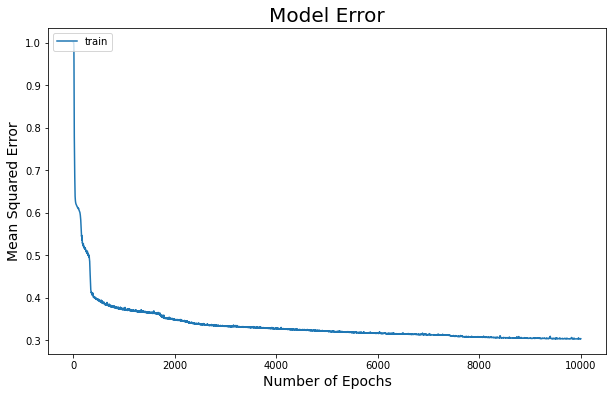

In [ ]:
# Visualizing the model's learning history
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_squared_error'])
plt.title('Model Error', fontsize=20)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.xlabel('Number of Epochs', fontsize=14)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Scaling up the outputs back to original
y_nn_pred = sc_y.inverse_transform(y_nn_pred_sc)

# Visualizing the accuracy of predicted values
nn_predicted_proof_strength = np.transpose(y_nn_pred)[0]
nn_predicted_tensile_strength = np.transpose(y_nn_pred)[1]
nn_predicted_pct_elongation = np.transpose(y_nn_pred)[2]
nn_predicted_pct_reduction_area = np.transpose(y_nn_pred)[3]

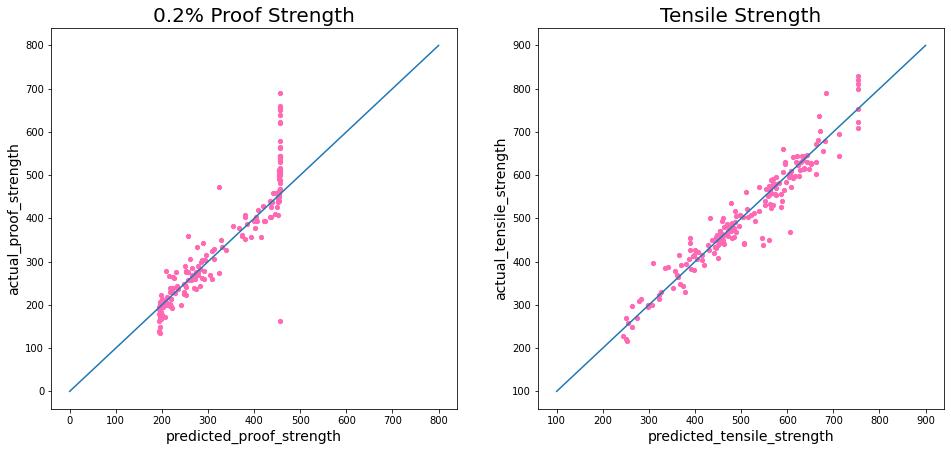

In [ ]:
# Plotting graphs for 0.2% Proof Strength and Tensile Strength
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(16,7))

ax0.scatter(nn_predicted_proof_strength, actual_proof_strength, color = 'hotpink', s=18)
x3 = np.linspace(0, 800, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('0.2% Proof Strength', fontsize = 20)
ax0.set_xlabel('predicted_proof_strength', fontsize = 14)
ax0.set_ylabel('actual_proof_strength', fontsize = 14)

ax1.scatter(nn_predicted_tensile_strength, actual_tensile_strength, color = 'hotpink', s=18)
x4 = np.linspace(100, 900, 1000)
y4 = x4
ax1.plot(x4, y4)
ax1.set_title('Tensile Strength', fontsize = 20)
ax1.set_xlabel('predicted_tensile_strength', fontsize = 14)
ax1.set_ylabel('actual_tensile_strength', fontsize = 14)

plt.show()

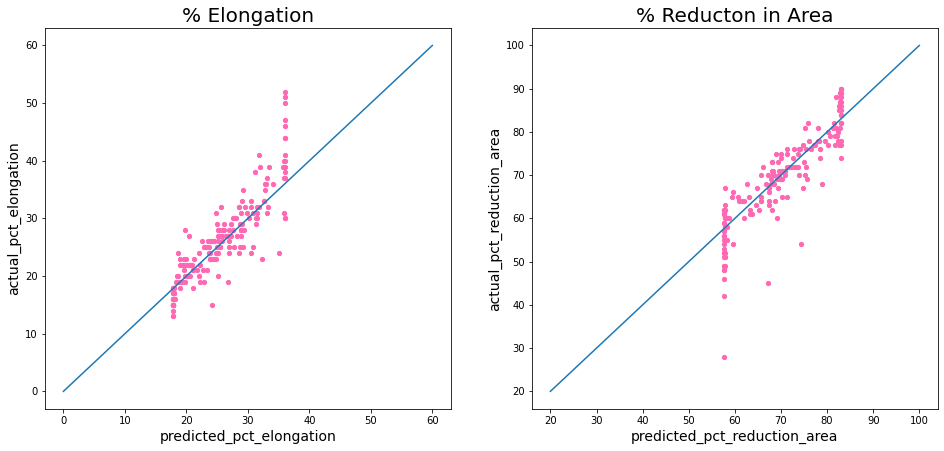

In [ ]:
# Plotting graphs for % Elongation and % Reduction in Area
fig, (ax2,ax3) = plt.subplots(1,2,figsize=(16,7))

ax2.scatter(nn_predicted_pct_elongation, actual_pct_elongation, color = 'hotpink', s=18)
x3 = np.linspace(0, 60, 1000)
y3 = x3
ax2.plot(x3, y3)
ax2.set_title('% Elongation', fontsize = 20)
ax2.set_xlabel('predicted_pct_elongation', fontsize = 14)
ax2.set_ylabel('actual_pct_elongation', fontsize = 14)

ax3.scatter(nn_predicted_pct_reduction_area, actual_pct_reduction_area, color = 'hotpink', s=18)
x4 = np.linspace(20, 100, 1000)
y4 = x4
ax3.plot(x4, y4)
ax3.set_title('% Reducton in Area', fontsize = 20)
ax3.set_xlabel('predicted_pct_reduction_area', fontsize = 14)
ax3.set_ylabel('actual_pct_reduction_area', fontsize = 14)

plt.show()

In [ ]:
# r2_score for each mechanical property
r2_proof_strength_nn = r2_score(actual_proof_strength, nn_predicted_proof_strength)
r2_tensile_strength_nn = r2_score(actual_tensile_strength, nn_predicted_tensile_strength)
r2_pct_elongation_nn = r2_score(actual_pct_elongation, nn_predicted_pct_elongation)
r2_pct_reduction_area_nn = r2_score(actual_pct_reduction_area, nn_predicted_pct_reduction_area)
print('R\u00b2_score for 0.2% Proof Strength = ' + str(round(r2_proof_strength_nn, 2)))
print('R\u00b2_score for Tensile strength    = ' + str(round(r2_tensile_strength_nn, 2)))
print('R\u00b2_score for % Elongation        = ' + str(round(r2_pct_elongation_nn, 2)))
print('R\u00b2_score for % Reduction in Area = ' + str(round(r2_pct_reduction_area_nn, 2)))

R²_score for 0.2% Proof Strength = 0.82
R²_score for Tensile strength    = 0.93
R²_score for % Elongation        = 0.75
R²_score for % Reduction in Area = 0.79


# Random Forest Regression

In [ ]:
# Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, criterion='mse')
regressor.fit(x_train_sc, y_train_sc)
y_rf_pred_sc = regressor.predict(x_test_sc)

# Calculating accuracy metrics
r2_rf = r2_score(y_test_sc, y_rf_pred_sc)
mse_rf = mean_squared_error(y_test_sc, y_rf_pred_sc)
mae_rf = mean_absolute_error(y_test_sc, y_rf_pred_sc)

# Printing the results
print('R\u00b2_score = ' + str(round(r2_rf, 2)) + '              Higher is better')
print('mean_squared_error = ' + str(round(mse_rf, 2)) + '    Lower is better')
print('mean_absolute_error = ' + str(round(mae_rf, 2)) + '   Lower is better')

R²_score = 0.91              Higher is better
mean_squared_error = 0.07    Lower is better
mean_absolute_error = 0.16   Lower is better


In [ ]:
 # Scaling up the inputs
y_rf_pred = sc_y.inverse_transform(y_rf_pred_sc)

# Visualizing the accuracy of predicted results
rf_predicted_proof_strength = np.transpose(y_rf_pred)[0]
rf_predicted_tensile_strength = np.transpose(y_rf_pred)[1]
rf_predicted_pct_elongation = np.transpose(y_rf_pred)[2]
rf_predicted_pct_reduction_area = np.transpose(y_rf_pred)[3]

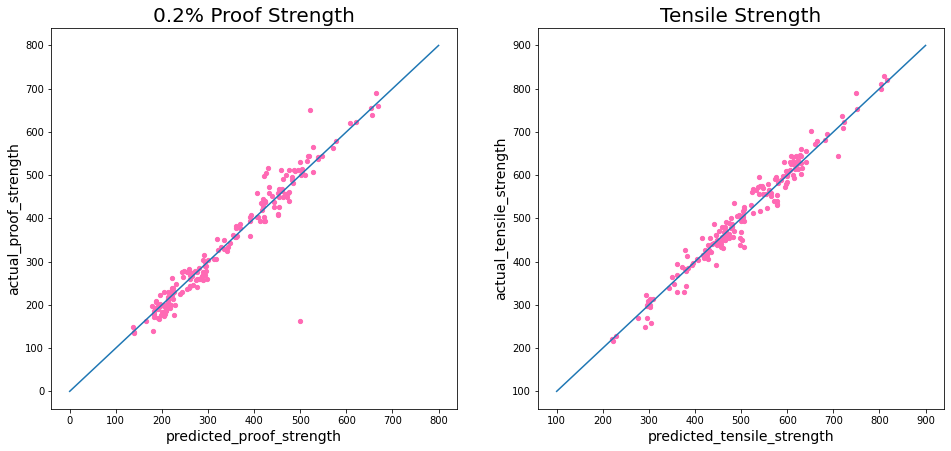

In [ ]:
# Plotting graphs for 0.2% Proof Strength and Tensile Strength
fig, (ax4,ax5) = plt.subplots(1,2,figsize=(16,7))

ax4.scatter(rf_predicted_proof_strength, actual_proof_strength, color = 'hotpink', s=18)
x3 = np.linspace(0, 800, 1000)
y3 = x3
ax4.plot(x3, y3)
ax4.set_title('0.2% Proof Strength', fontsize = 20)
ax4.set_xlabel('predicted_proof_strength', fontsize = 14)
ax4.set_ylabel('actual_proof_strength', fontsize = 14)

ax5.scatter(rf_predicted_tensile_strength, actual_tensile_strength, color = 'hotpink', s=18)
x4 = np.linspace(100, 900, 1000)
y4 = x4
ax5.plot(x4, y4)
ax5.set_title('Tensile Strength', fontsize = 20)
ax5.set_xlabel('predicted_tensile_strength', fontsize = 14)
ax5.set_ylabel('actual_tensile_strength', fontsize = 14)

plt.show()

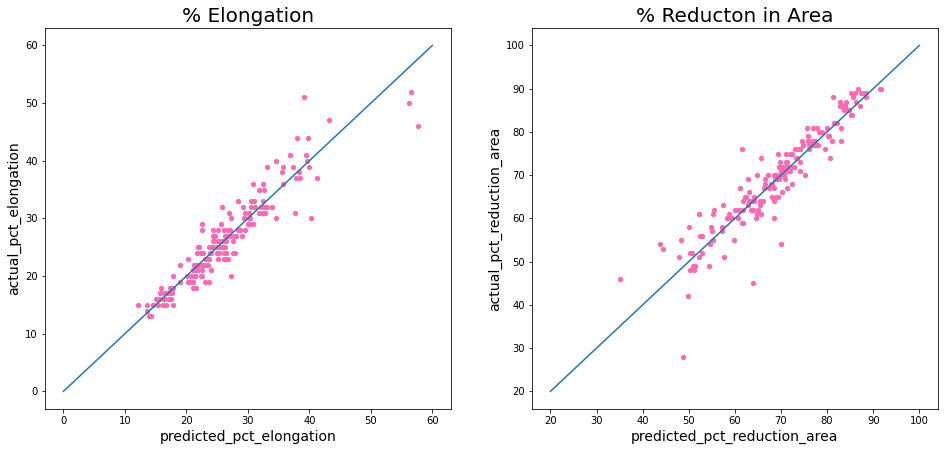

In [ ]:
# Plotting graphs for % Elongation and % Reduction in Area
fig, (ax6,ax7) = plt.subplots(1,2,figsize=(16,7))

ax6.scatter(rf_predicted_pct_elongation, actual_pct_elongation, color = 'hotpink', s=18)
x3 = np.linspace(0, 60, 1000)
y3 = x3
ax6.plot(x3, y3)
ax6.set_title('% Elongation', fontsize = 20)
ax6.set_xlabel('predicted_pct_elongation', fontsize = 14)
ax6.set_ylabel('actual_pct_elongation', fontsize = 14)

ax7.scatter(rf_predicted_pct_reduction_area, actual_pct_reduction_area, color = 'hotpink', s=18)
x4 = np.linspace(20, 100, 1000)
y4 = x4
ax7.plot(x4, y4)
ax7.set_title('% Reducton in Area', fontsize = 20)
ax7.set_xlabel('predicted_pct_reduction_area', fontsize = 14)
ax7.set_ylabel('actual_pct_reduction_area', fontsize = 14)

plt.show()

In [ ]:
# r2_score for each mechanical property
r2_proof_strength_rf = r2_score(actual_proof_strength, rf_predicted_proof_strength)
r2_tensile_strength_rf = r2_score(actual_tensile_strength, rf_predicted_tensile_strength)
r2_pct_elongation_rf = r2_score(actual_pct_elongation, rf_predicted_pct_elongation)
r2_pct_reduction_area_rf = r2_score(actual_pct_reduction_area, rf_predicted_pct_reduction_area)
print('R\u00b2_score for 0.2% Proof Strength = ' + str(round(r2_proof_strength_rf, 2)))
print('R\u00b2_score for Tensile strength    = ' + str(round(r2_tensile_strength_rf, 2)))
print('R\u00b2_score for % Elongation        = ' + str(round(r2_pct_elongation_rf, 2)))
print('R\u00b2_score for % Reduction in Area = ' + str(round(r2_pct_reduction_area_rf, 2)))

R²_score for 0.2% Proof Strength = 0.93
R²_score for Tensile strength    = 0.97
R²_score for % Elongation        = 0.87
R²_score for % Reduction in Area = 0.87


# Comparing both the models

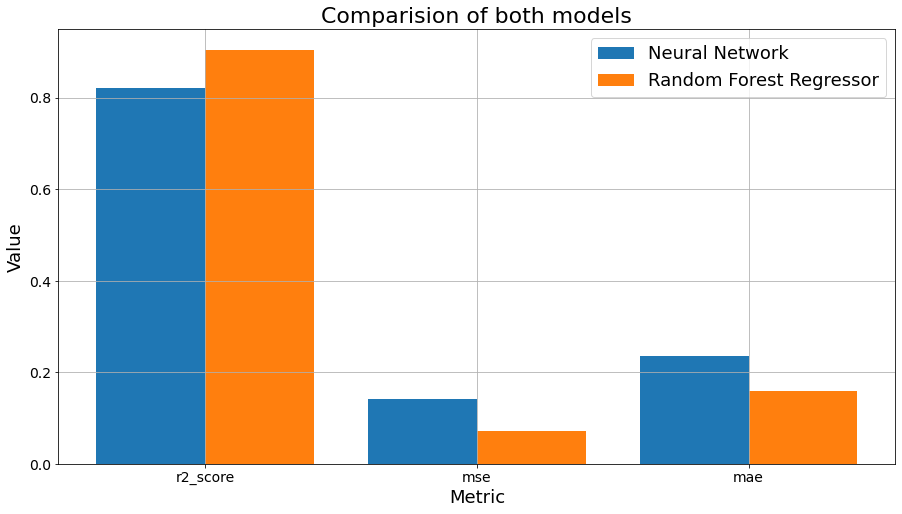

In [ ]:
fig= plt.figure(figsize=(15,8))
X = ['r2_score', 'mse', 'mae']
nn = [r2_nn, mse_nn, mae_nn]
rf = [r2_rf, mse_rf, mae_rf]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, nn, 0.4, label = 'Neural Network')
plt.bar(X_axis + 0.2, rf, 0.4, label = 'Random Forest Regressor')
  
plt.xticks(X_axis, X, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Metric", fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.title("Comparision of both models", fontsize=22)
plt.legend(fontsize = 18)
plt.grid()
plt.show()

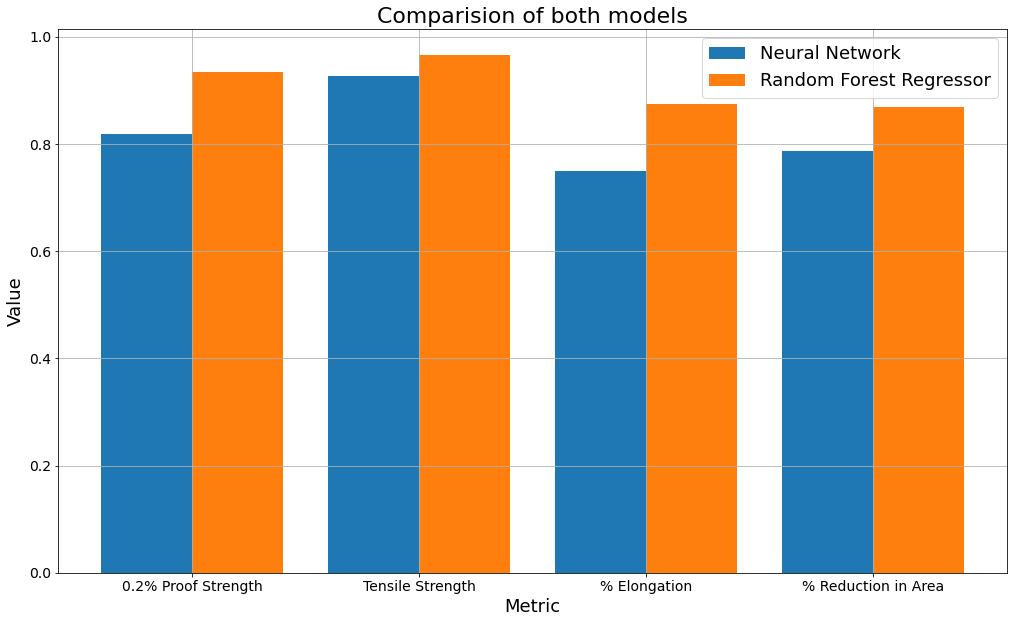

In [ ]:
fig= plt.figure(figsize=(17,10))
X = ['0.2% Proof Strength', 'Tensile Strength', '% Elongation', '% Reduction in Area']
nn = [r2_proof_strength_nn, r2_tensile_strength_nn, r2_pct_elongation_nn, r2_pct_reduction_area_nn]
rf = [r2_proof_strength_rf, r2_tensile_strength_rf, r2_pct_elongation_rf, r2_pct_reduction_area_rf]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, nn, 0.4, label = 'Neural Network')
plt.bar(X_axis + 0.2, rf, 0.4, label = 'Random Forest Regressor')
  
plt.xticks(X_axis, X, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Metric", fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.title("Comparision of both models", fontsize=22)
plt.legend(fontsize = 18)
plt.grid()
plt.show()

# Conclusion
 
The random forest regressor performs better in each category and overall as compared to neural networks. Being computationally cheap to train, manually easer to fine-tune and highly versatile to fit itself on a complex data containing regressions within clusters, this model makes for an ideal choice for prediction of mechanical properties of low-alloy steels with R² score of 0.91 which is significantly greater than R² score of Neural Network which is 0.82